In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import time
import itertools
from scipy import stats
import psycopg2 as psql
from psycopg2.extras import RealDictCursor

import seaborn as sns
sns.set(color_codes=True)

try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)

/home/victor/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


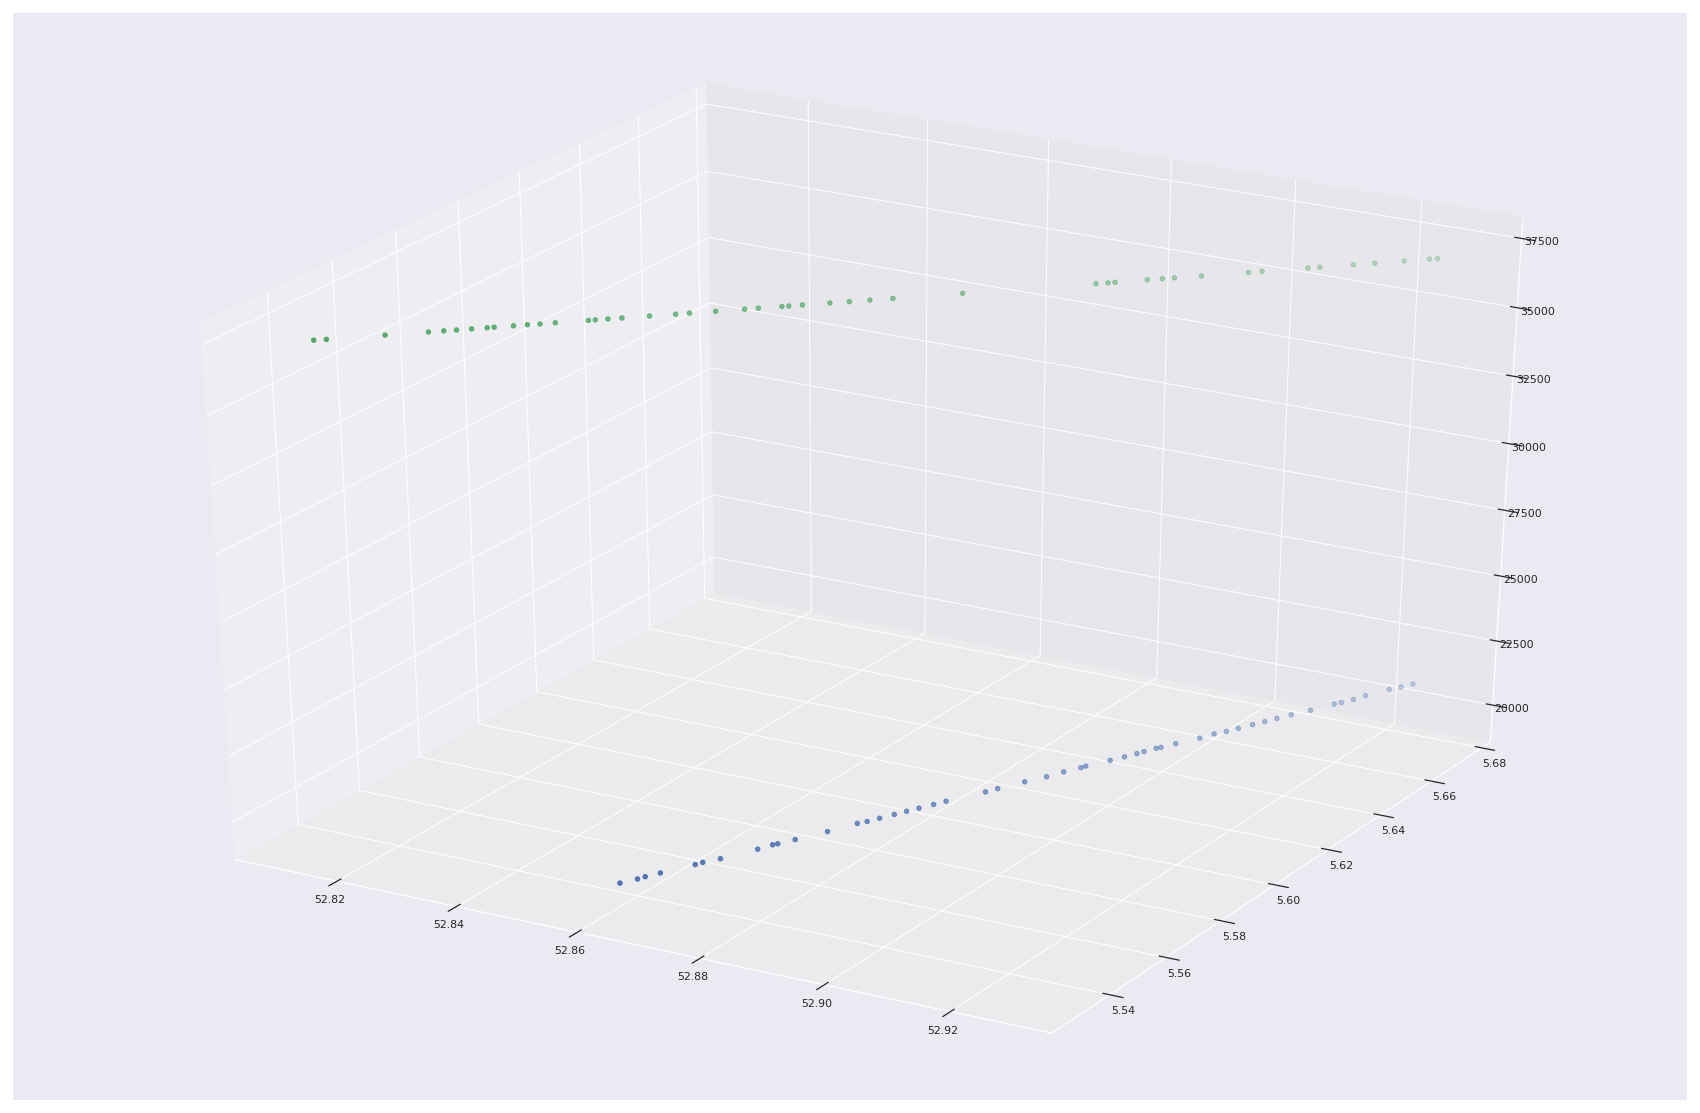

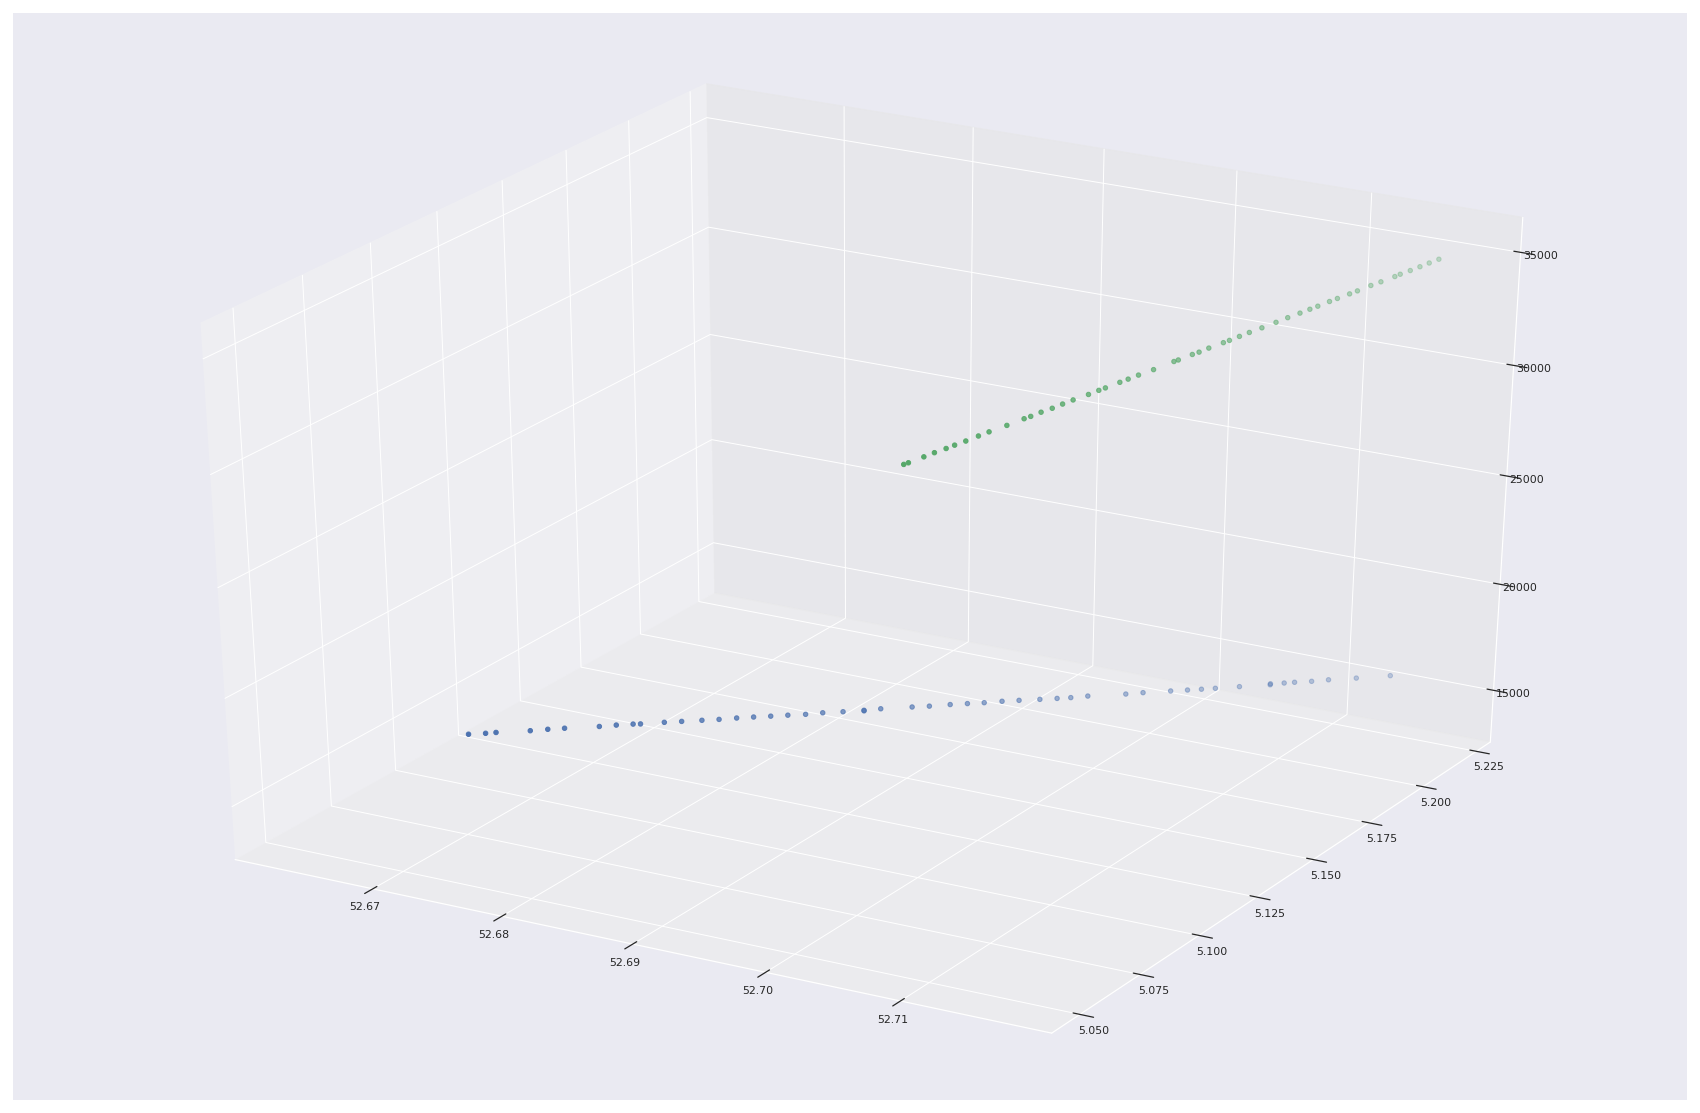

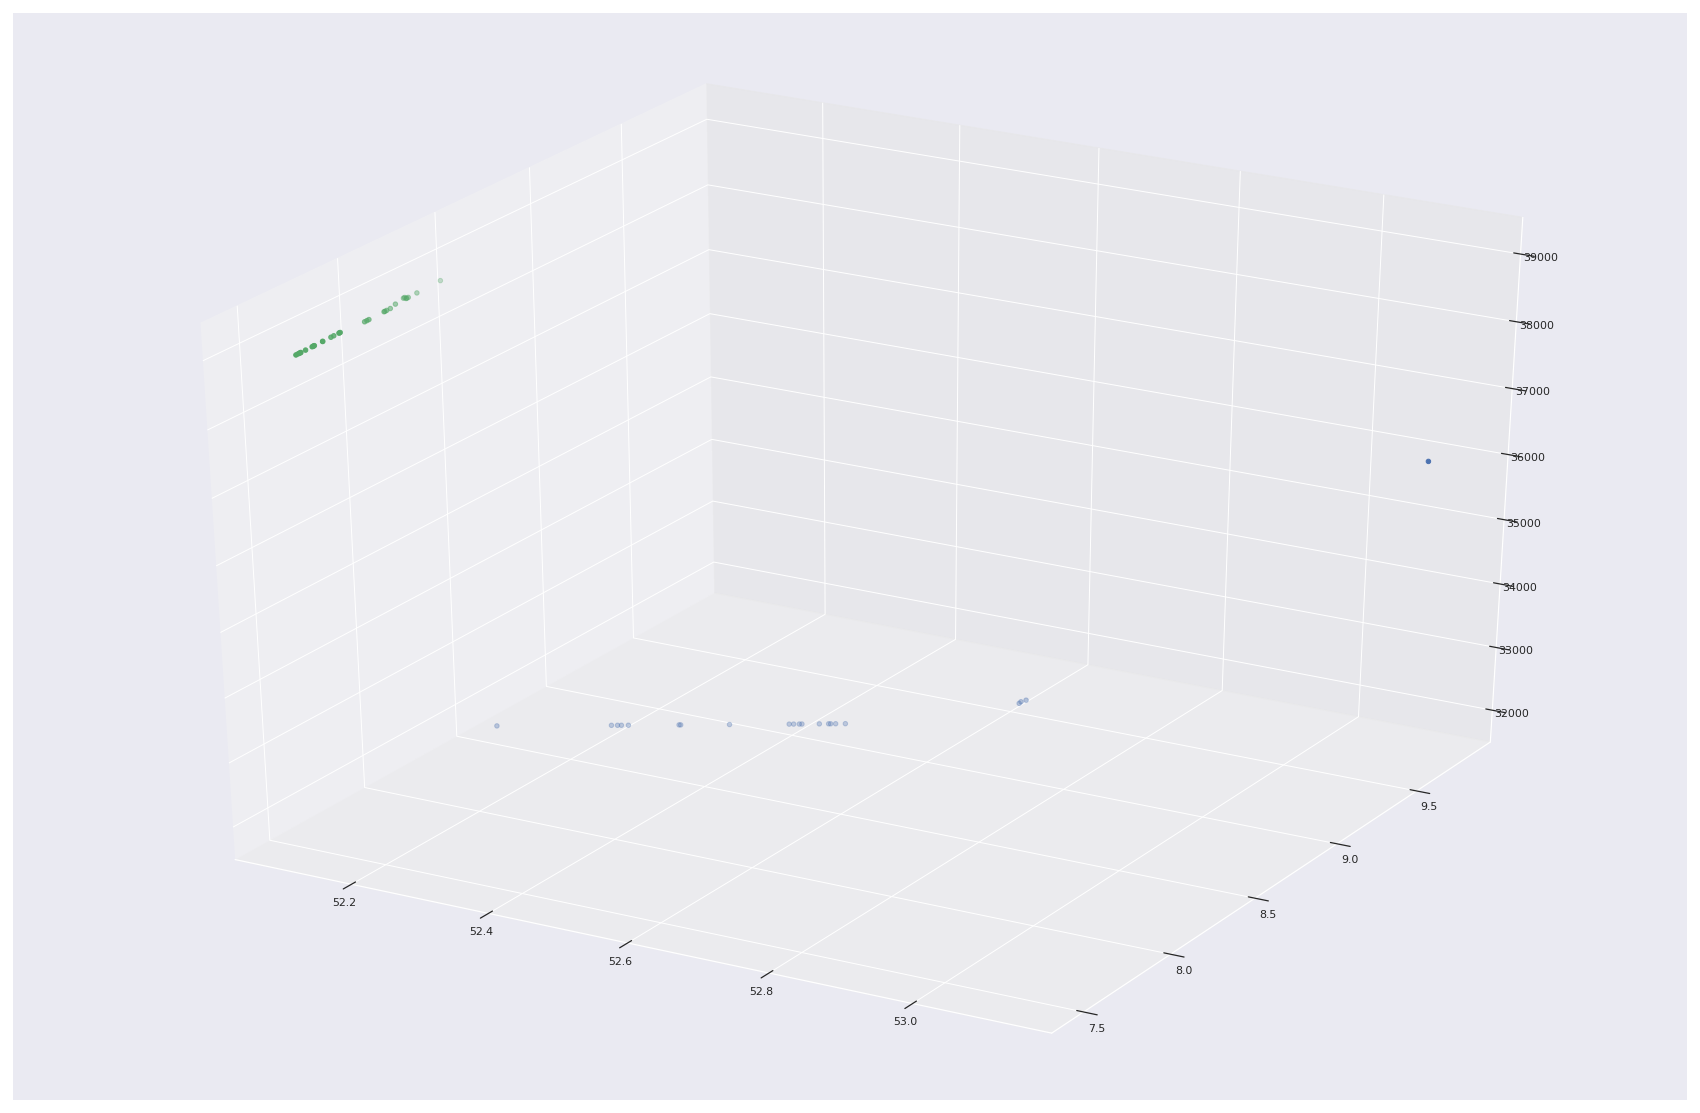

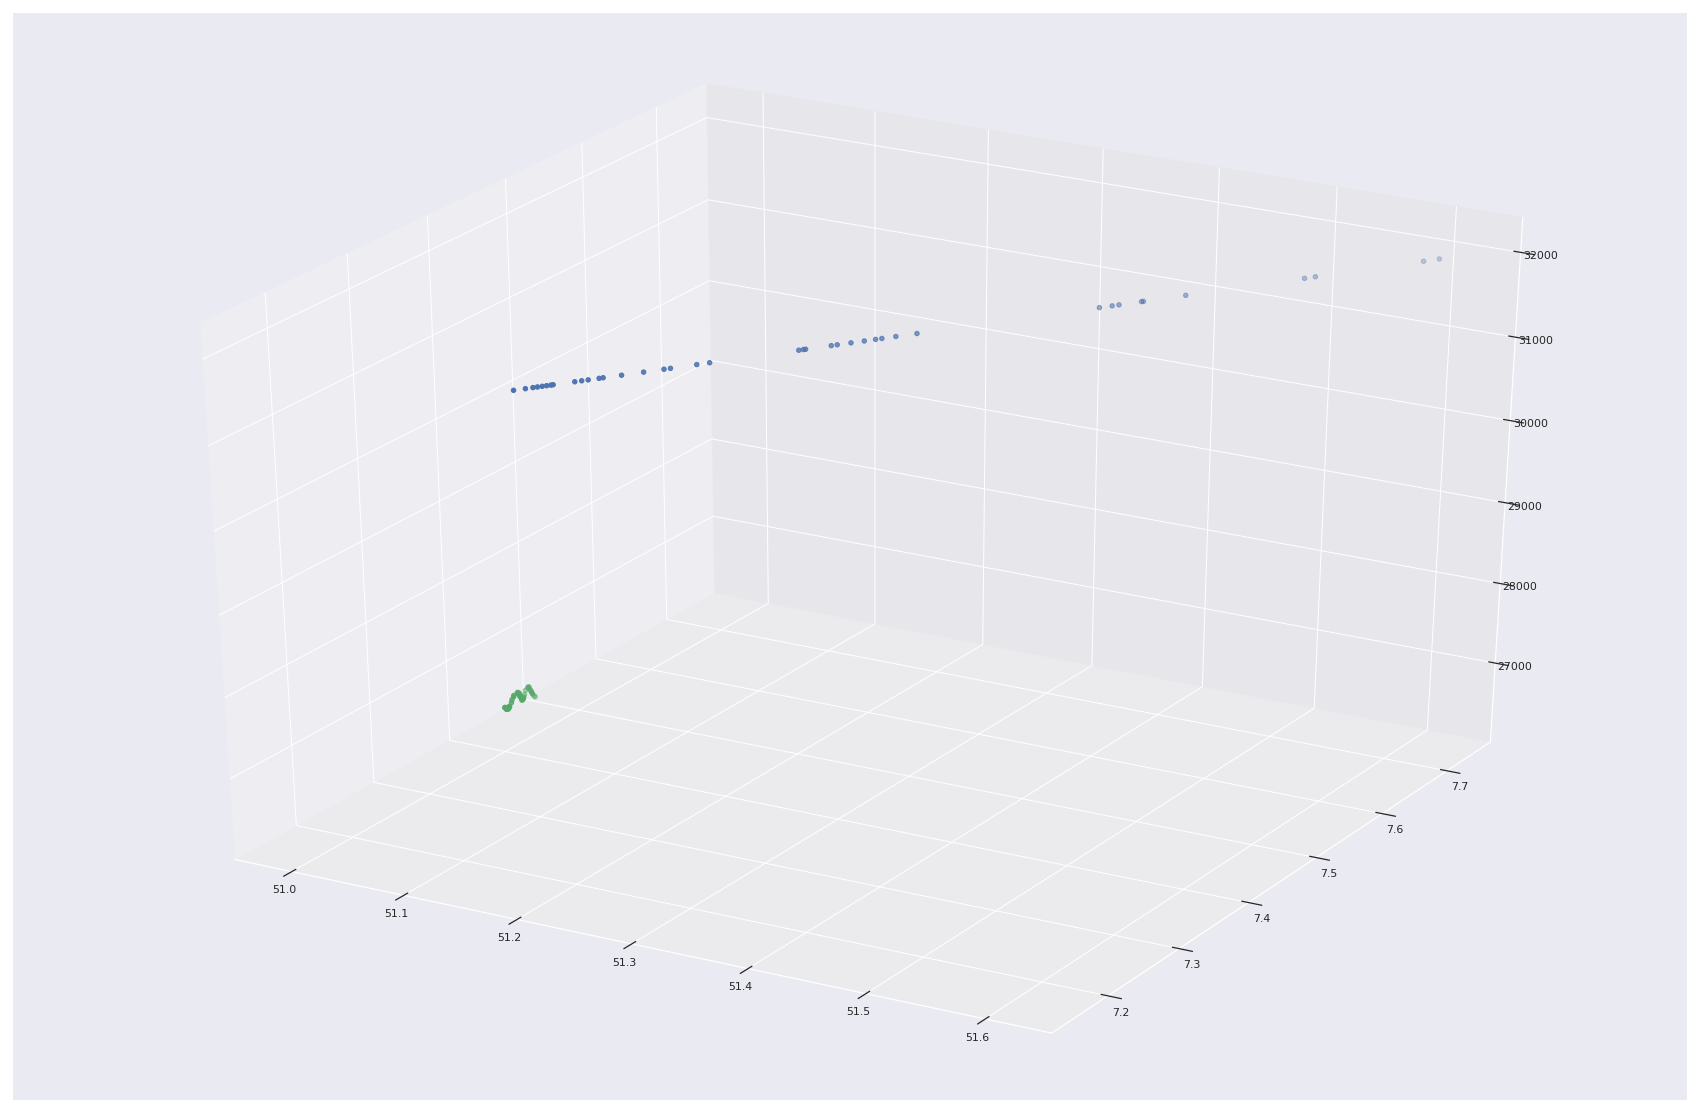

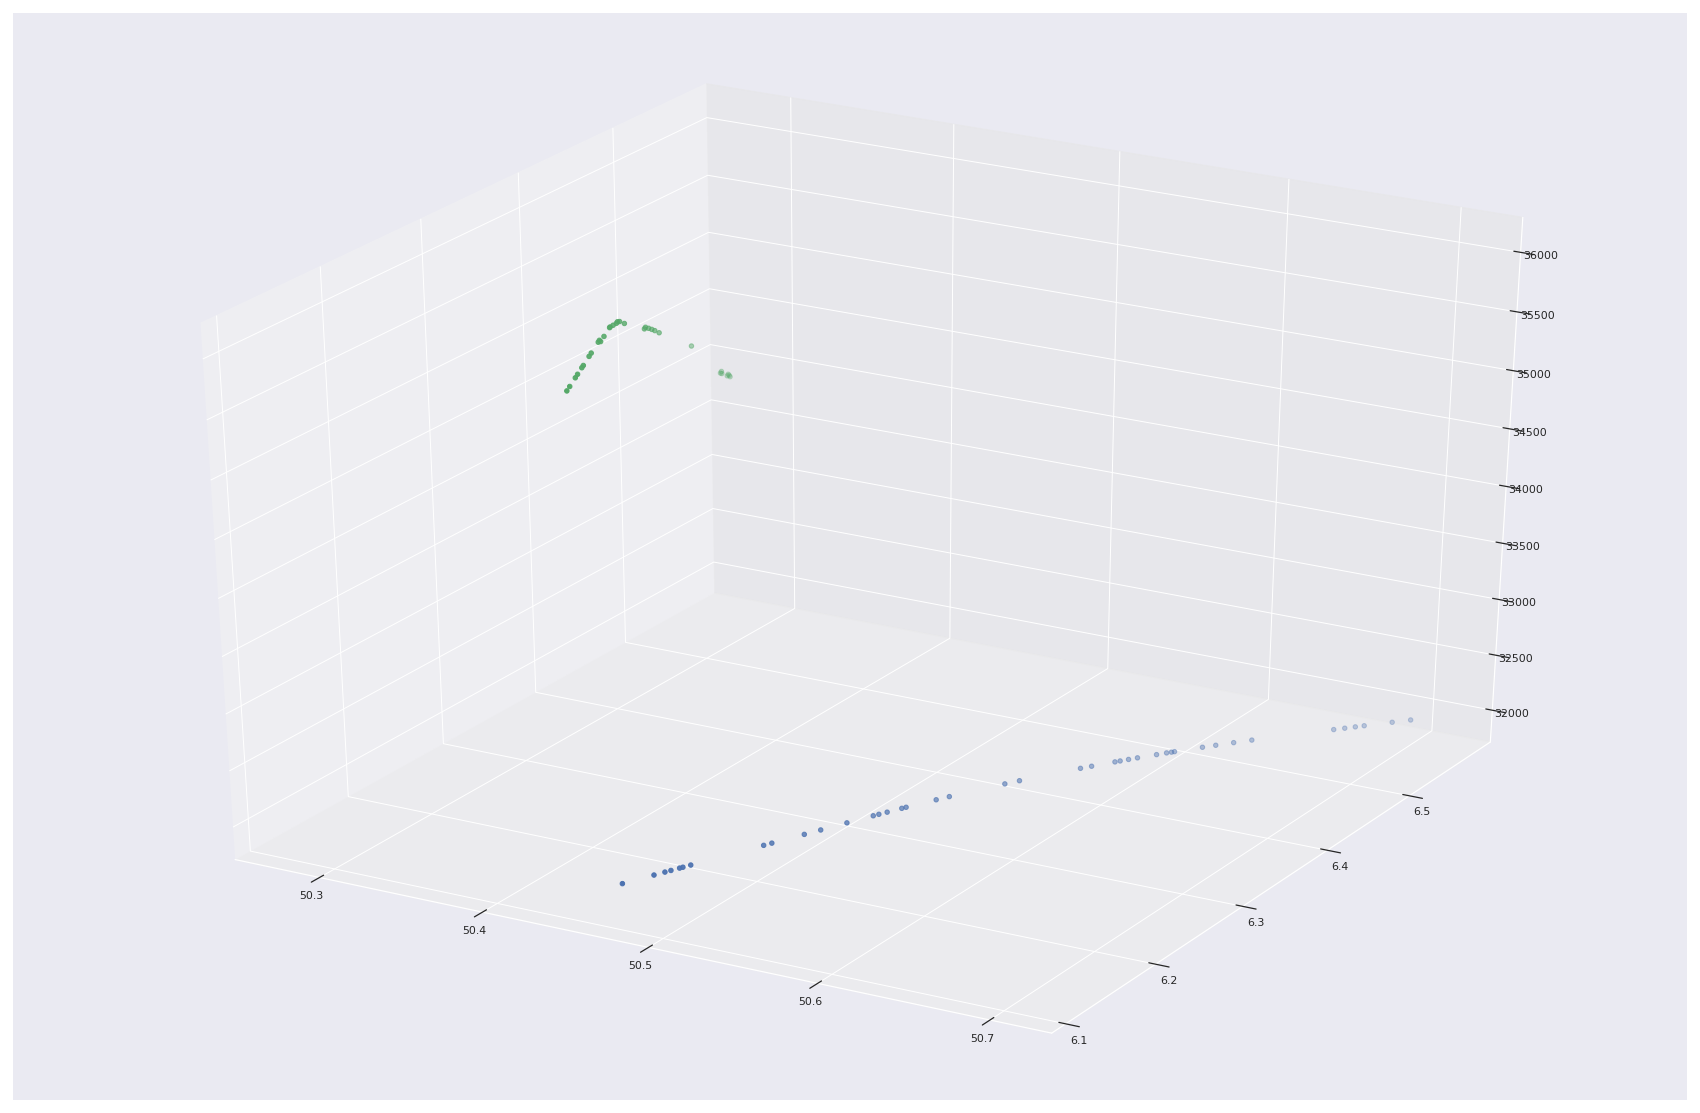

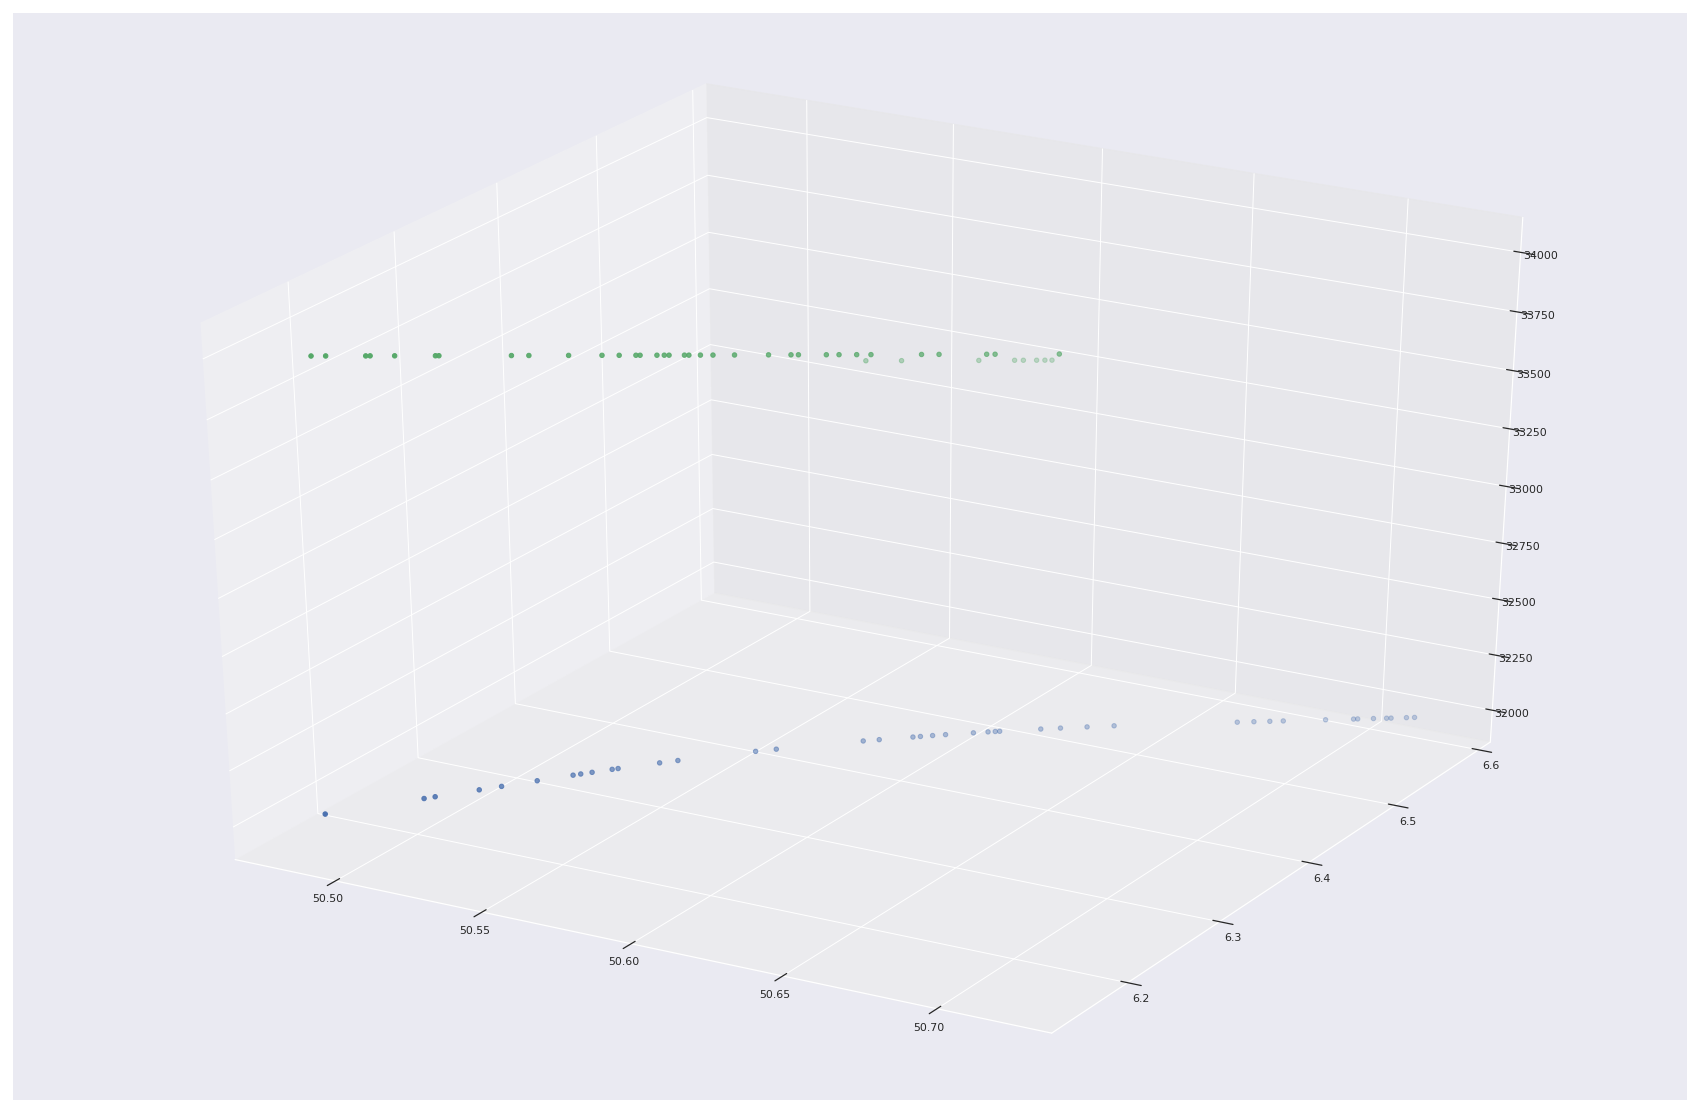

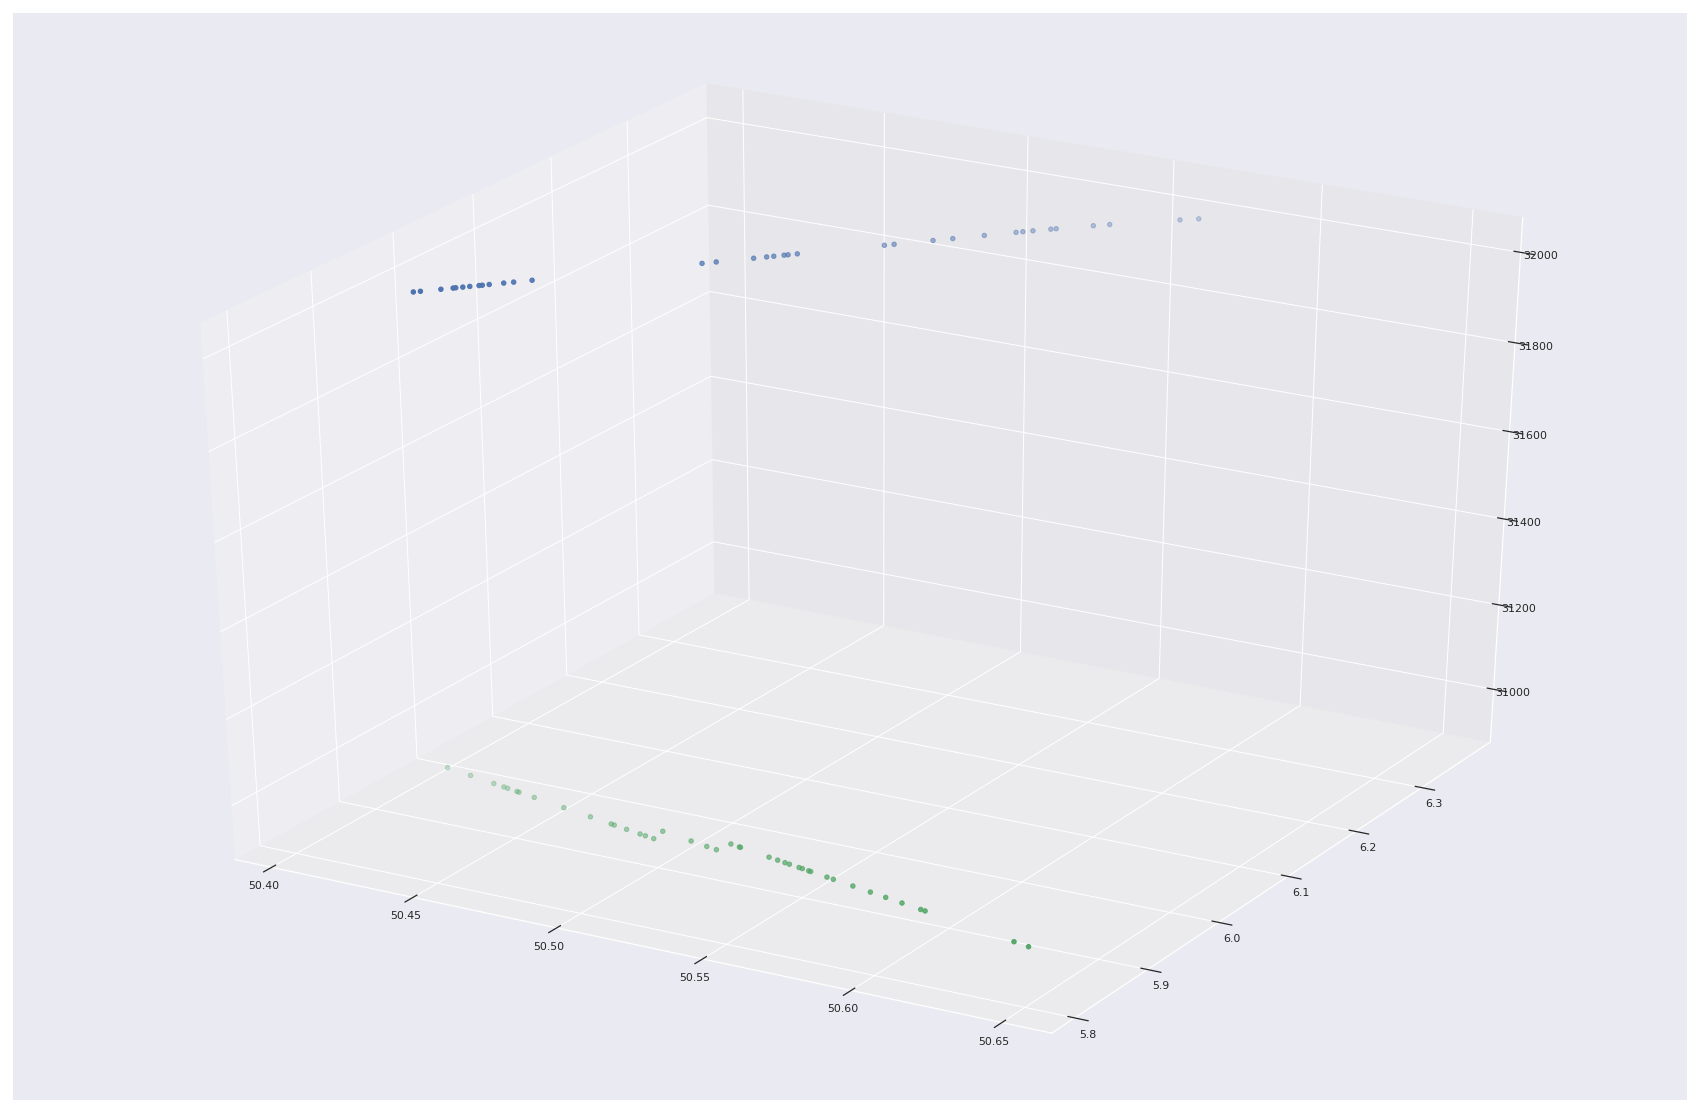

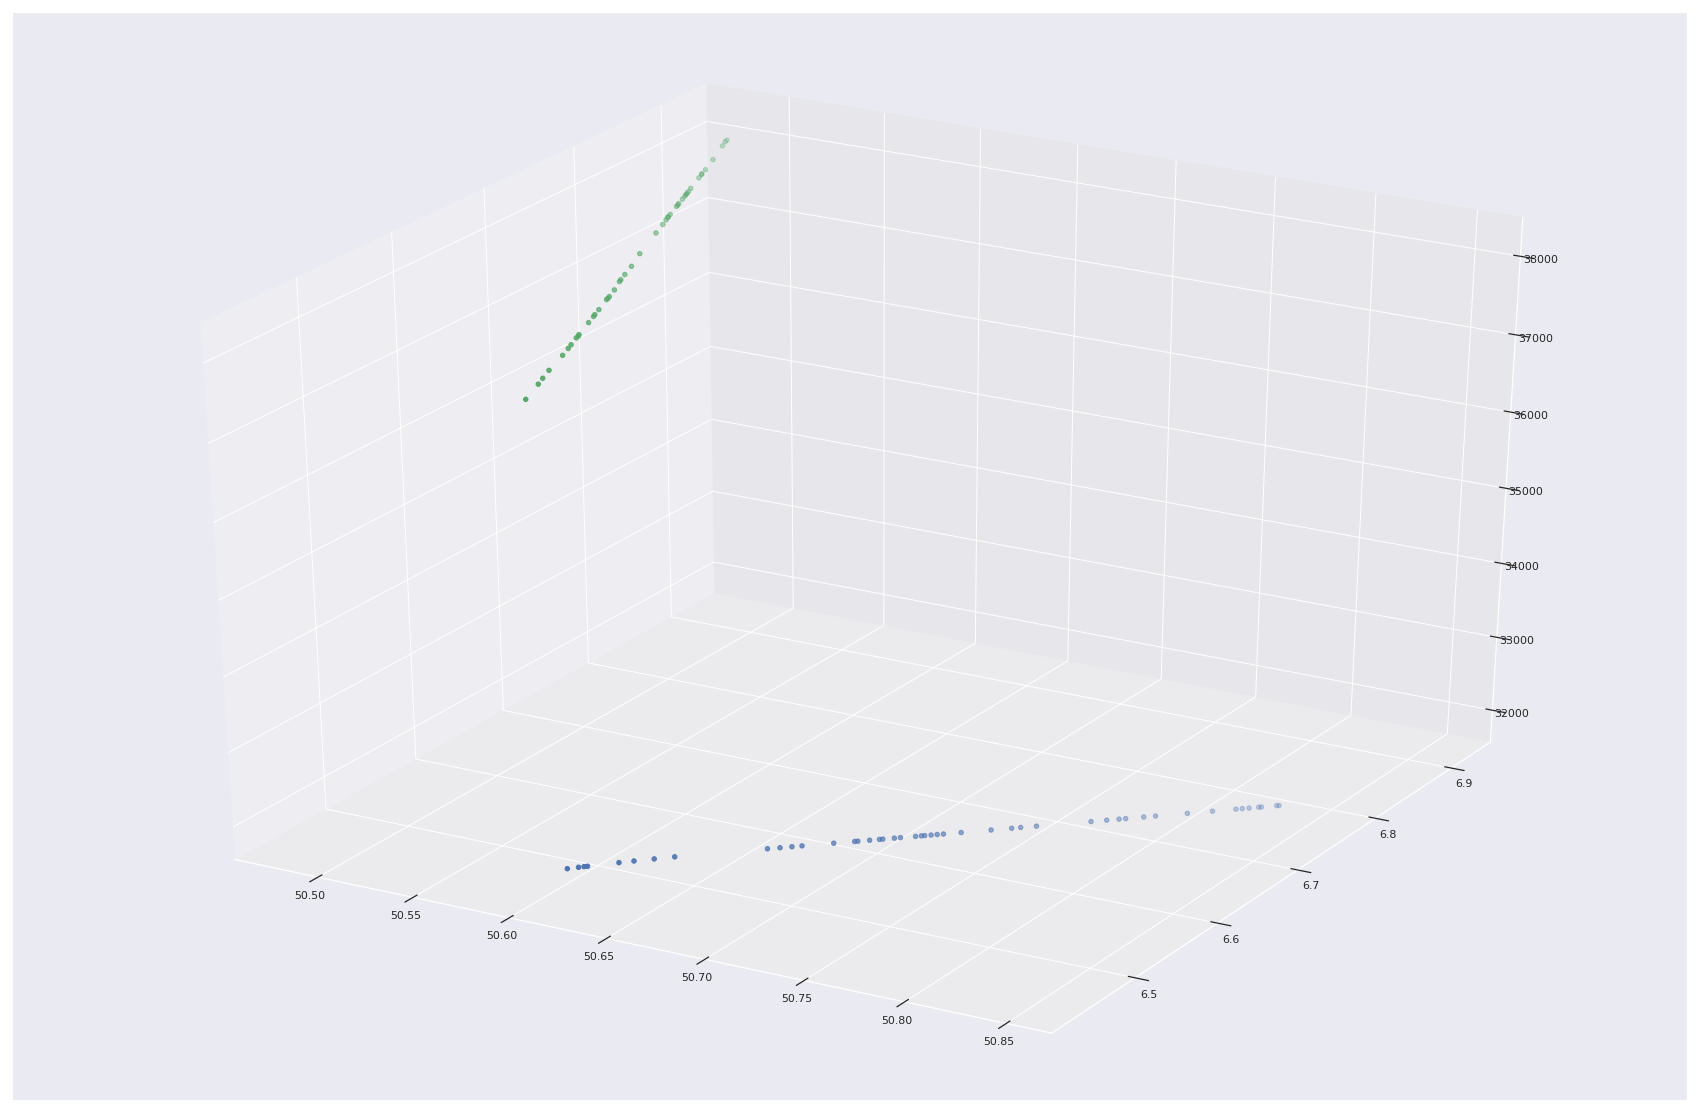

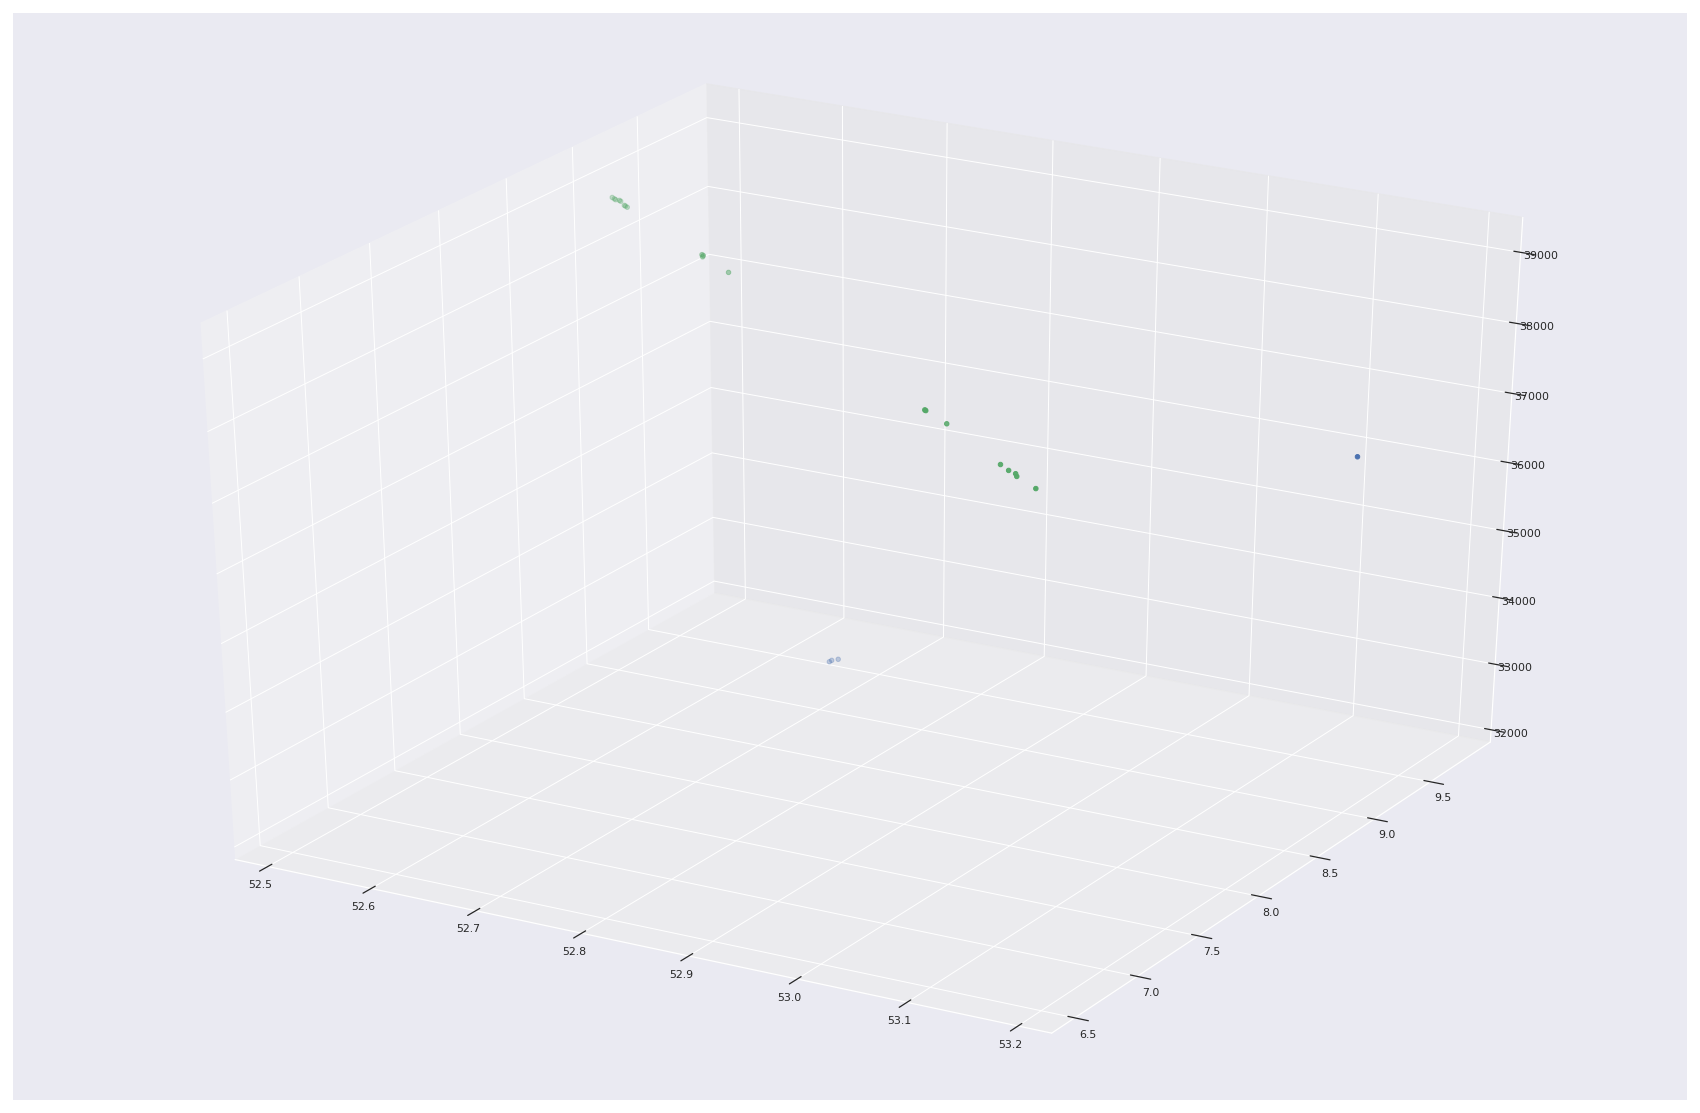

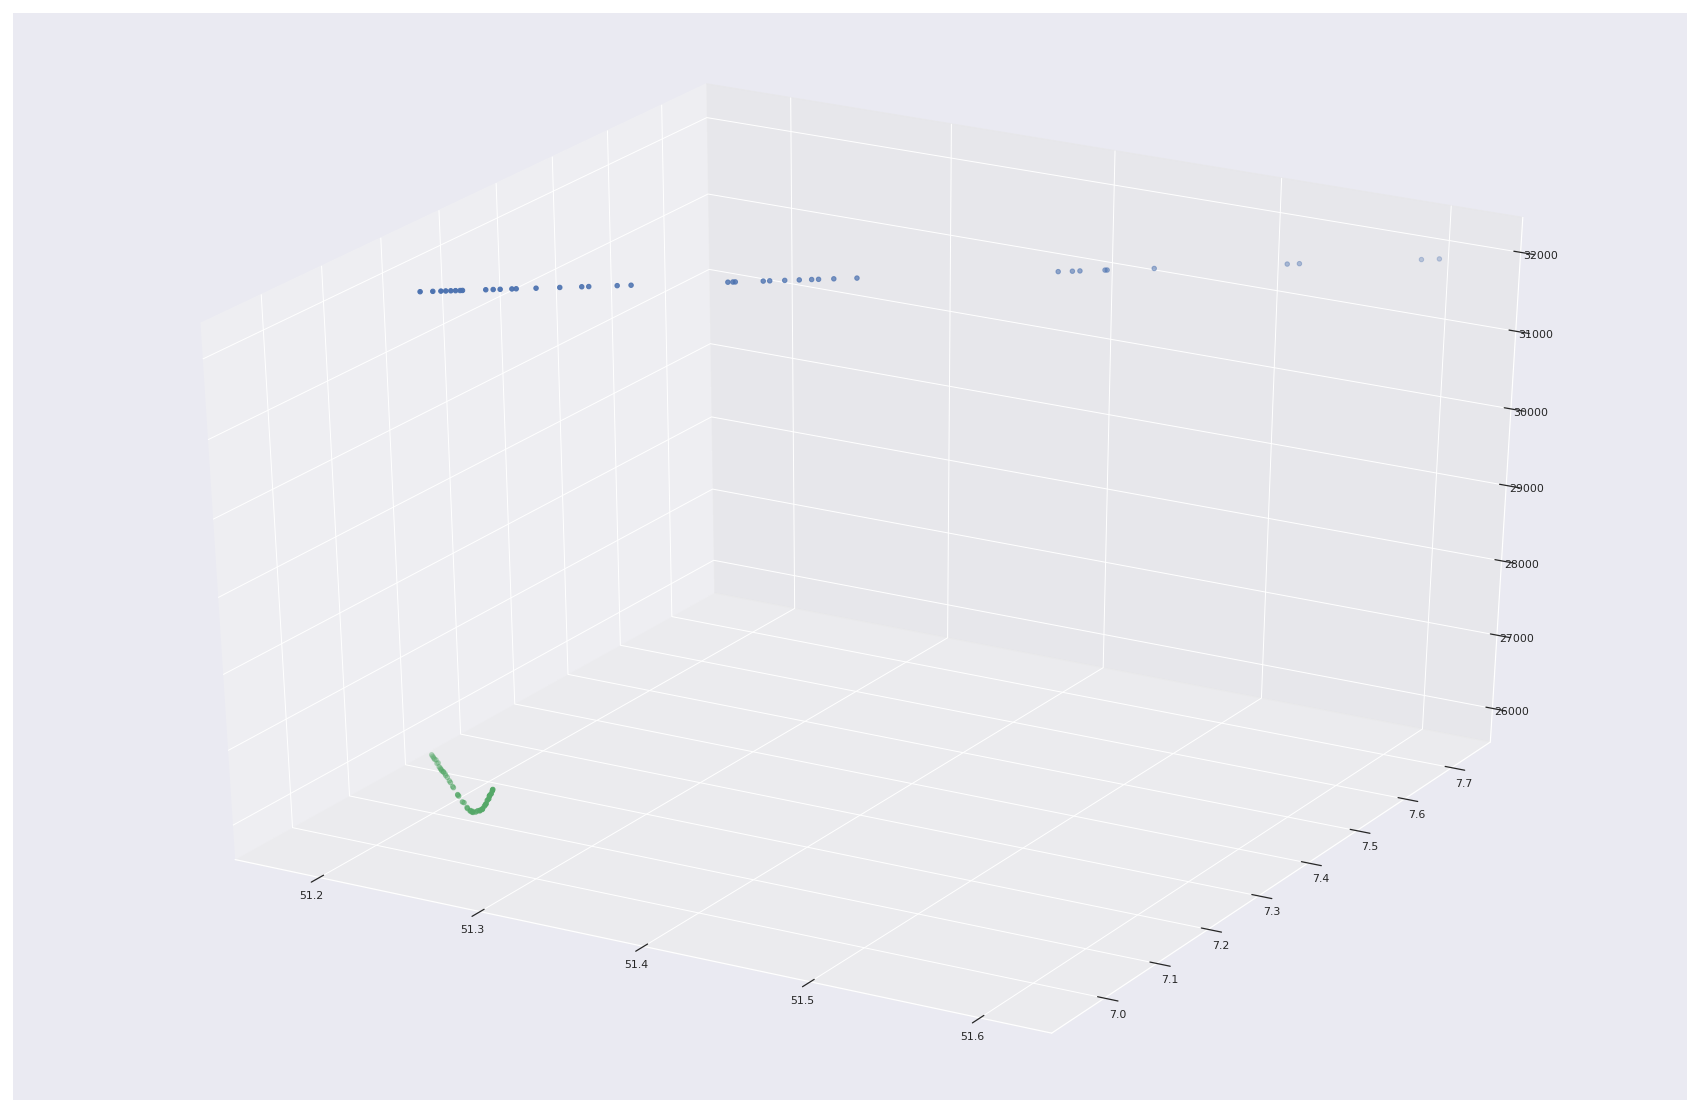

In [22]:
cur_read = conn.cursor(cursor_factory=RealDictCursor)
cur_read.execute("SELECT * FROM public.conflicts LIMIT 10;")
batch = cur_read.fetchall()

from mpl_toolkits.mplot3d import Axes3D

for b in batch:
    alt_1 = pd.Series(data=b['alt_1'])
    alt_2 = pd.Series(data=b['alt_2'])

    alt_1 = alt_1.fillna(method='ffill')
    alt_1 = alt_1.fillna(method='bfill')
    alt_2 = alt_2.fillna(method='ffill')
    alt_2 = alt_2.fillna(method='bfill')
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(b['lat_1'][-50:],b['lon_1'][-50:],alt_1[-50:], c='b', depthshade=True)
    ax.scatter(b['lat_2'][-50:],b['lon_2'][-50:],alt_2[-50:], c='g', depthshade=True)
    plt.show()